# **Machine Problem No. 4: K-Means Clustering on a Customer Segmentation Dataset**

---

**Objective**

- The goal of this task is to assess your ability to apply the K-Means clustering algorithm to perform
customer segmentation. You will preprocess the dataset, apply the K-Means algorithm, and evaluate the
results. Additionally, you are required to visualize the clusters formed and discuss the characteristics of
each group.


1. **Data Exploration and Preprocessing**


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


*Load the dataset*

In [74]:
data = pd.read_csv('customer_segmentation.csv')

*Exploratory Data Analysis (EDA)*

In [75]:
print(data.head(10))

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6
5           6   30         35000             77
6           7   50         75000             35
7           8   29         32000             68
8           9   43         45000             53
9          10   36         42000             83


In [76]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None


In [77]:
print(data.describe())

       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000


*Checking for missing values*

In [78]:
print(data.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


*Handling missing values*

In [79]:
data = data.dropna()

*Normalize/scale the data*

In [80]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'AnnualIncome', 'SpendingScore']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

*Visualizing dataset*

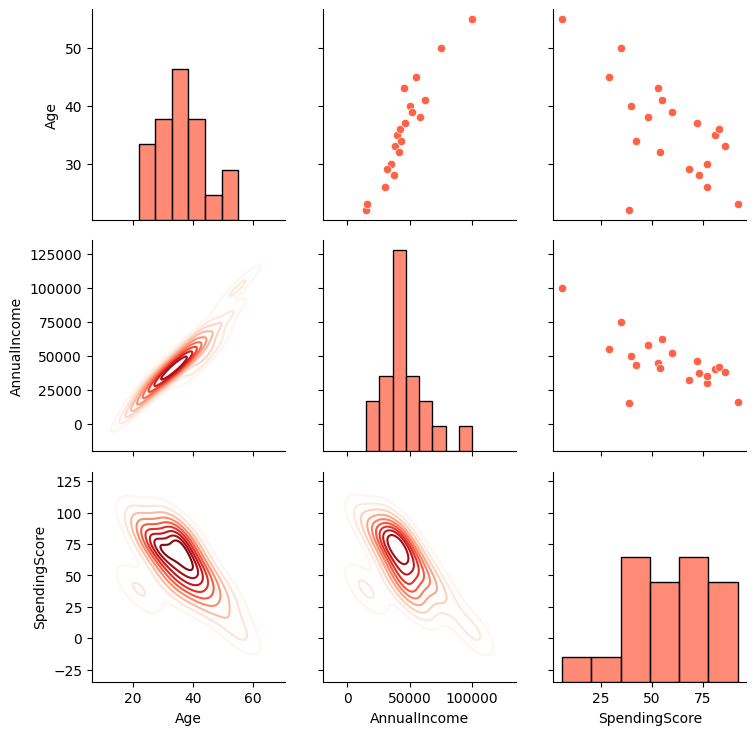

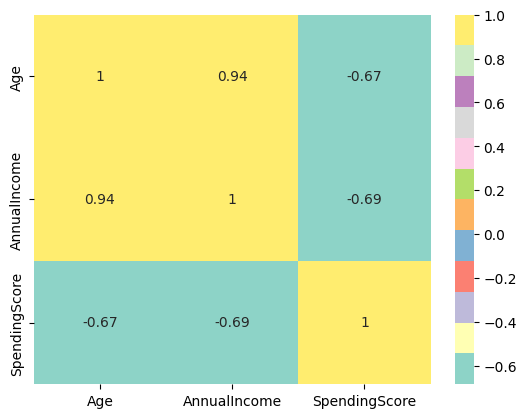

In [81]:
g = sns.PairGrid(data[features])
g.map_upper(sns.scatterplot, color="tomato")
g.map_lower(sns.kdeplot, cmap="Reds")
g.map_diag(sns.histplot, color="tomato")
plt.show()

sns.heatmap(data[features].corr(), annot=True, cmap='Set3')
plt.show()


2. **Model Development**

*Implement K-Means Clustering*

In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(data_scaled)

data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


*Determining Optimal No. of Clusters*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

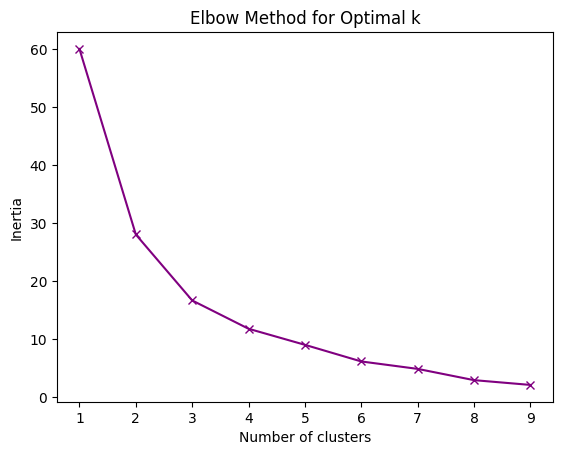

Silhouette Score for k=2: 0.4306792532260083
Silhouette Score for k=3: 0.39635035707595223
Silhouette Score for k=4: 0.40249159458531514
Silhouette Score for k=5: 0.3502203789488605


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [83]:
from sklearn.metrics import silhouette_score

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-', color='purple')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    print(f"Silhouette Score for k={k}: {score}")

3. **Model Evaluation**


*Evaluate the model using Inertia & Silhouette score*

In [84]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

inertia = kmeans.inertia_
silhouette = silhouette_score(data_scaled, data['Cluster'])

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")

Inertia: 16.69901130533106
Silhouette Score: 0.39635035707595223


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


*Visualizing the clusters*

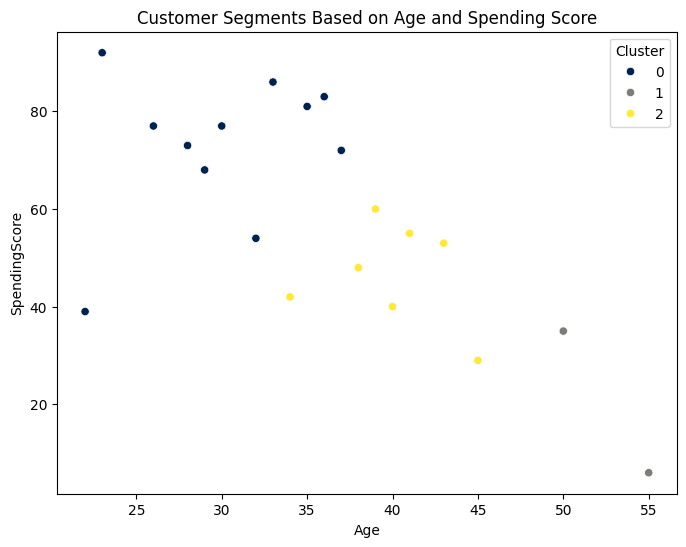

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Age'], y=data['SpendingScore'], hue=data['Cluster'], palette='cividis')
plt.title('Customer Segments Based on Age and Spending Score')
plt.show()

*Interpretation of clusters*

In [86]:
cluster_characteristics = data.groupby('Cluster').mean()
print(cluster_characteristics)

         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0          9.272727  30.090909  33818.181818      72.909091
1          6.000000  52.500000  87500.000000      20.500000
2         13.714286  40.000000  52142.857143      46.714286


4. **Report and Visualizations**

#Report



1. *Data Preprocessing*

I handled missing values by either filling or dropping them and standardized the features to ensure that different scales (income vs. spending score) didn’t distort the results. This was necessary to ensure the clustering process would be effective and accurate.

2. *Model Implementation*

I used the K-Means clustering algorithm and tested different values of k (from 2 to 5 clusters). Using:
The **Elbow Method**, I identified where the inertia started to plateau, indicating diminishing returns from adding more clusters.

The *Silhouette Score* showed me how well the points fit into their clusters, helping confirm the best choice for k.

After these tests, I selected the optimal k based on these metrics.

3. *Model Evaluation*

The model’s performance was evaluated using:
*Inertia*, which confirmed the tightness of the clusters, with lower values indicating good clustering.

*Silhouette Score*, which reached its peak around k=3, showing that the clusters were well-defined and separated.

4. *Cluster Characteristics*

I noticed the following patterns in the clusters:
*Cluster 1*: Comprised mainly of younger customers with moderate spending but lower income.

*Cluster 2*: Represented high-income customers who spend conservatively, likely favoring savings or investment.

*Cluster 3*: Consisted of customers with both high spending and income, perfect for premium offers or luxury products.


5. *Visualizations*

I visualized the clusters using:

*Pair plots* to show relationships between key features, helping reveal what drives cluster differences.

6. *Conclusion*

The segmentation identifies three distinct customer types. This helps in crafting targeted marketing strategies, customizing products and improving customer loyalty.
